# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=100,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.02,
    population_initializer=VentInitializer(
        population_size=1000,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params,
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 100
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 1000
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.02
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fi

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

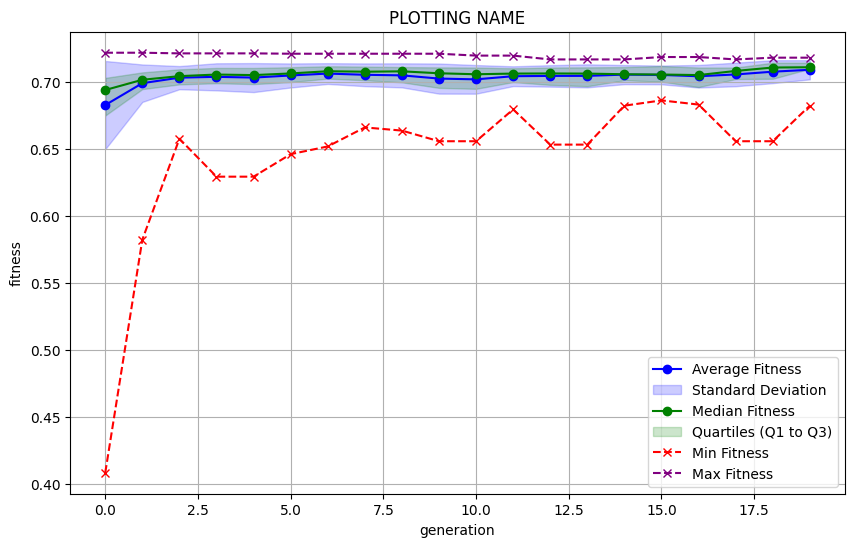

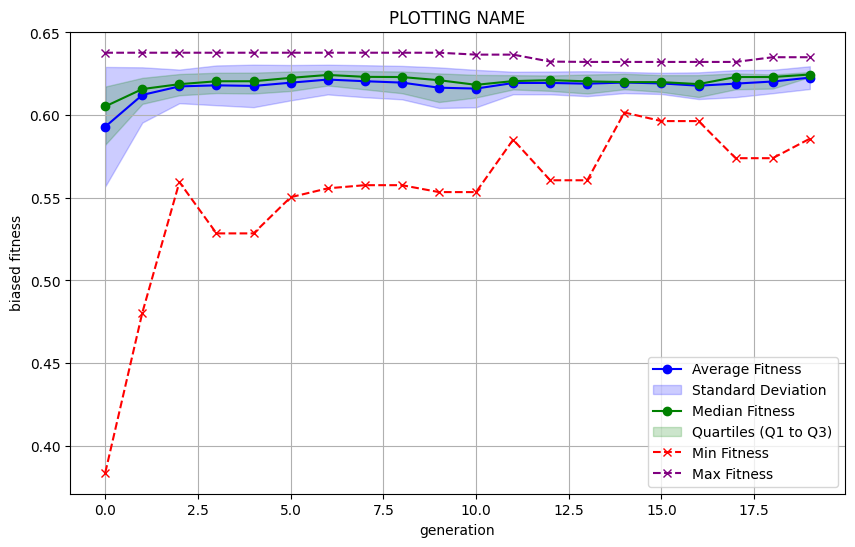

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_995: ['DoubleParabolicShape_617', 'CornerTransformation_443']
predict: (0.2888159284658629, 373.24546180000004, 457.1464671)
biased_fitness: 0.626056758277919, fitness: 0.7098810708413706
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


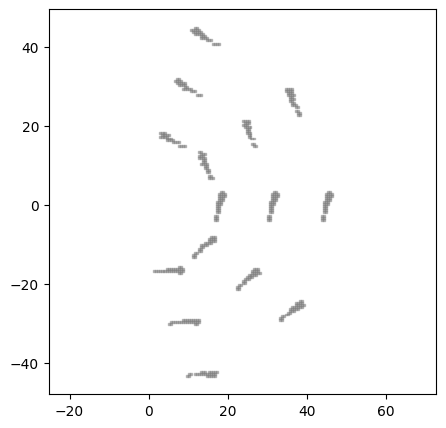

--------------------------------------------------
label: VentHole Chromosome_617: ['DoubleParabolicShape_995', 'CornerTransformation_617']
predict: (0.28866797214145956, 373.1184141000001, 457.02272889999983)
biased_fitness: 0.6290108617195658, fitness: 0.7126145635854045
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


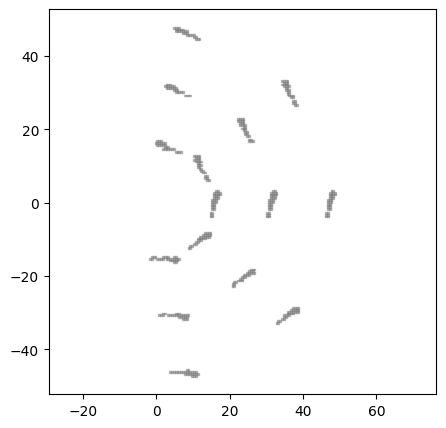

--------------------------------------------------
label: VentHole Chromosome_995: ['DoubleParabolicShape_527', 'CornerTransformation_499']
predict: (0.2888159284658629, 373.24546180000004, 457.1464671)
biased_fitness: 0.626056758277919, fitness: 0.7098810708413706
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


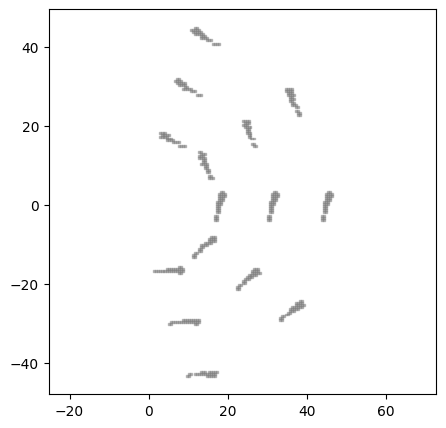

--------------------------------------------------
label: VentHole Chromosome_617: ['DoubleParabolicShape_882', 'CornerTransformation_443']
predict: (0.28881095560657677, 373.40909619999985, 456.77047319999997)
biased_fitness: 0.6260601941079259, fitness: 0.7109925969342331
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


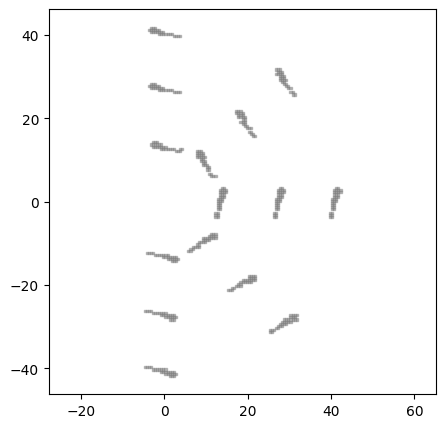

--------------------------------------------------
label: VentHole Chromosome_268: ['WingShape_497', 'CornerTransformation_882']
predict: (0.28979424608942117, 373.6538647999998, 457.55054419999993)
biased_fitness: 0.6095101423481046, fitness: 0.6960354941057896
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


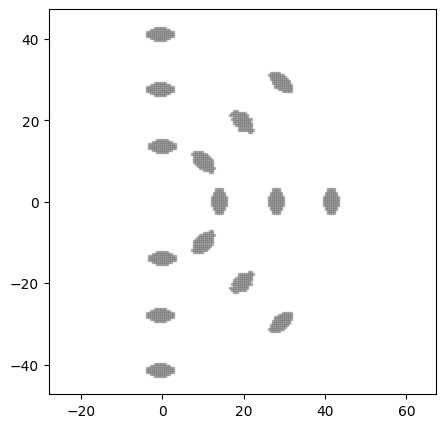

--------------------------------------------------
label: VentHole Chromosome_995: ['WingShape_268', 'CornerTransformation_882']
predict: (0.2898095176106903, 373.54515520000007, 457.8564425999997)
biased_fitness: 0.609228092250336, fitness: 0.6948968348930982
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


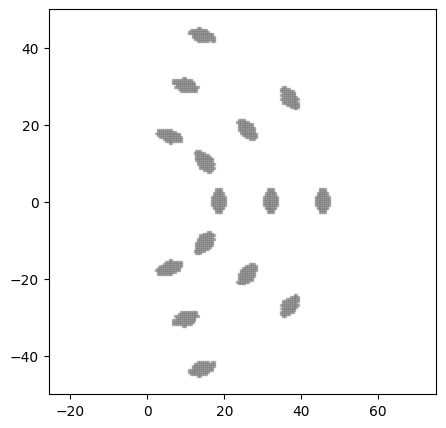

--------------------------------------------------
label: VentHole Chromosome_189: ['DoubleParabolicShape_499', 'CornerTransformation_796']
predict: (0.28881095560657677, 373.40909619999985, 456.77047319999997)
biased_fitness: 0.6260601941079259, fitness: 0.7109925969342331
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


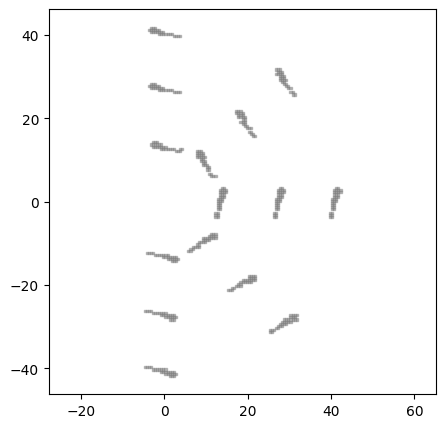

--------------------------------------------------
label: VentHole Chromosome_177: ['CircleShape_389', 'CornerTransformation_268']
predict: (0.289632241216196, 373.64201840000004, 457.29330589999984)
biased_fitness: 0.6123519191732557, fitness: 0.6990009663380403
shape parameter:
parameter_list: [ r: 2.903238059093633, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


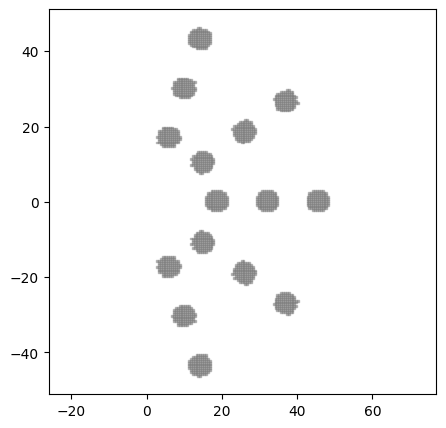

--------------------------------------------------
label: VentHole Chromosome_389: ['CircleShape_177', 'CornerTransformation_572']
predict: (0.28882475693583465, 372.96272970000007, 457.50353059999986)
biased_fitness: 0.6266326931983147, fitness: 0.7094211291416538
shape parameter:
parameter_list: [ r: 2.903238059093633, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


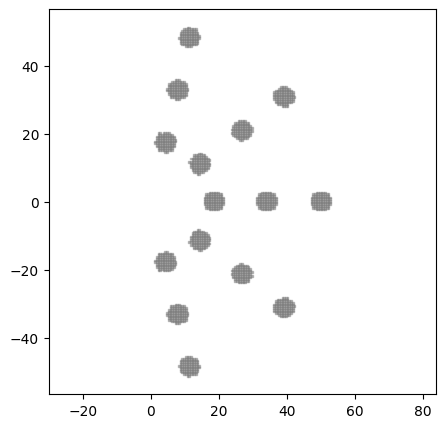

--------------------------------------------------
label: VentHole Chromosome_995: ['WingShape_572', 'CornerTransformation_335']
predict: (0.28969690126633596, 373.69079569999997, 456.7103433999999)
biased_fitness: 0.6123687169712968, fitness: 0.701025291836641
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


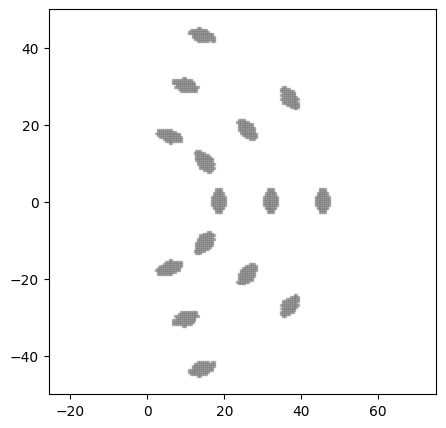

--------------------------------------------------
label: VentHole Chromosome_617: ['WingShape_882', 'CornerTransformation_995']
predict: (0.28964646717477605, 372.9478080000001, 457.28317989999994)
biased_fitness: 0.6156440597531347, fitness: 0.7023803887522392
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


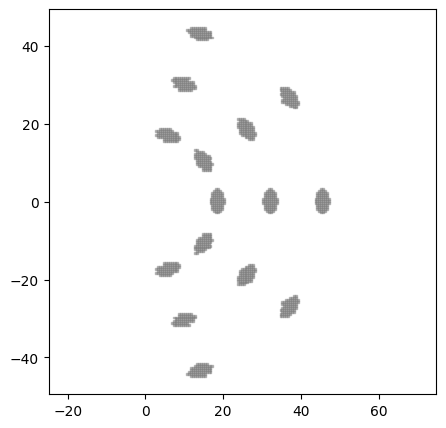

--------------------------------------------------
label: VentHole Chromosome_268: ['WingShape_572', 'CornerTransformation_150']
predict: (0.2898095176106903, 373.54515520000007, 457.8564425999997)
biased_fitness: 0.609228092250336, fitness: 0.6948968348930982
shape parameter:
parameter_list: [ c: 2.2858284106416193, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


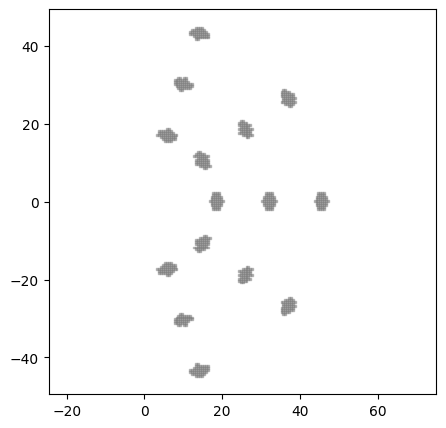

--------------------------------------------------
label: VentHole Chromosome_572: ['WingShape_617', 'CornerTransformation_389']
predict: (0.28885256582800434, 373.0059037, 456.67982949999976)
biased_fitness: 0.6276749009079398, fitness: 0.7130456757199579
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


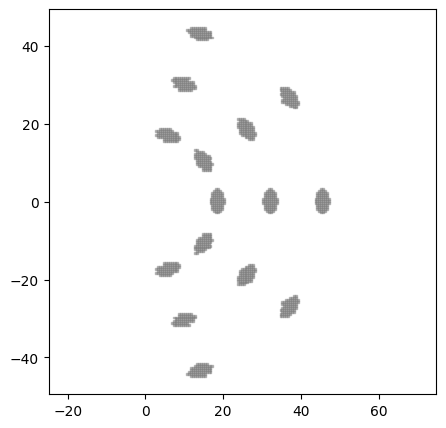

--------------------------------------------------
label: VentHole Chromosome_189: ['WingShape_268', 'CornerTransformation_970']
predict: (0.28950729098484906, 372.94658240000007, 458.055828)
biased_fitness: 0.6160533582121126, fitness: 0.6999150381515088
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


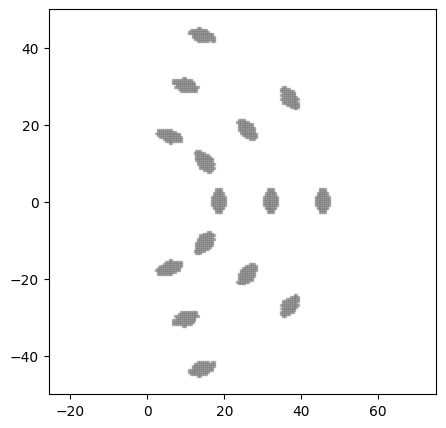

--------------------------------------------------
label: VentHole Chromosome_617: ['WingShape_443', 'CornerTransformation_177']
predict: (0.2890982866019183, 373.0156565, 455.42072589999987)
biased_fitness: 0.6267042532731444, fitness: 0.716835221980818
shape parameter:
parameter_list: [ c: 2.7728083130456866, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


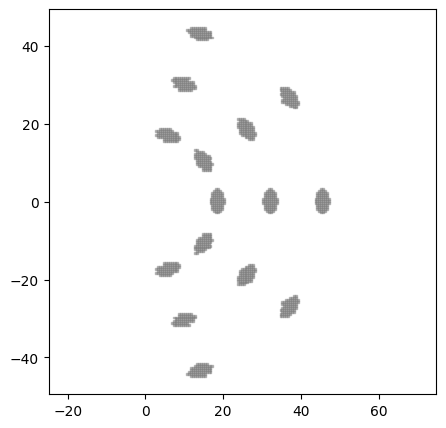

--------------------------------------------------
label: VentHole Chromosome_499: ['WingShape_617', 'CornerTransformation_268']
predict: (0.2889721174514541, 372.65047189999996, 458.22911079999983)
biased_fitness: 0.6246797745796426, fitness: 0.7058809119854597
shape parameter:
parameter_list: [ c: 2.7728083130456866, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


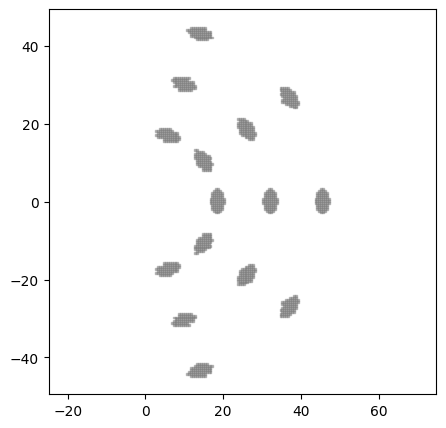

--------------------------------------------------
label: VentHole Chromosome_499: ['WingShape_499', 'CornerTransformation_970']
predict: (0.2897376378335834, 373.41953090000004, 458.9439917999999)
biased_fitness: 0.6086874322298321, fitness: 0.6908060081641662
shape parameter:
parameter_list: [ c: 2.7728083130456866, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


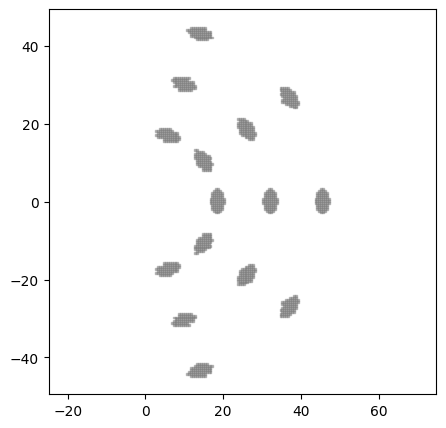

--------------------------------------------------
label: VentHole Chromosome_617: ['DoubleParabolicShape_882', 'CornerTransformation_499']
predict: (0.28881095560657677, 373.40909619999985, 456.77047319999997)
biased_fitness: 0.6260601941079259, fitness: 0.7109925969342331
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


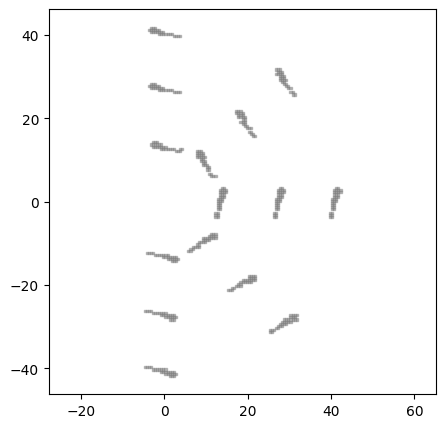

--------------------------------------------------
label: VentHole Chromosome_936: ['DoubleParabolicShape_311', 'CornerTransformation_617']
predict: (0.28857409642987264, 373.12937450000027, 457.18567590000004)
biased_fitness: 0.6299444256817814, fitness: 0.712683783701272
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


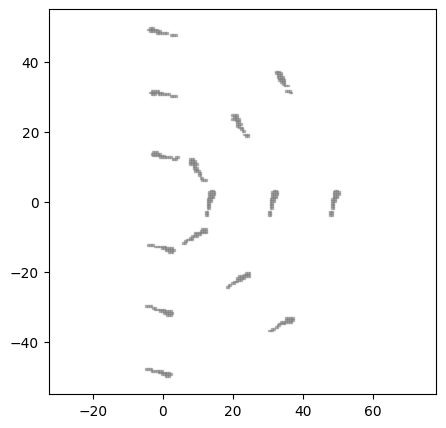

--------------------------------------------------
label: VentHole Chromosome_443: ['DoubleParabolicShape_92', 'CornerTransformation_189']
predict: (0.28881095560657677, 373.40909619999985, 456.77047319999997)
biased_fitness: 0.6260601941079259, fitness: 0.7109925969342331
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


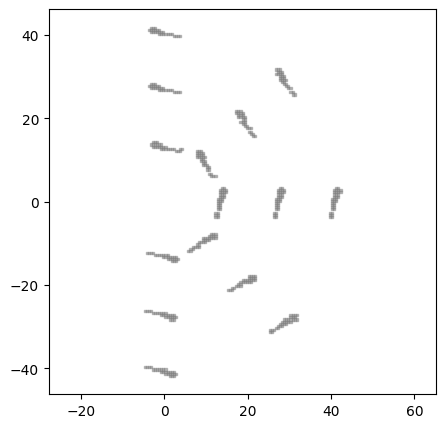

--------------------------------------------------
label: VentHole Chromosome_189: ['WingShape_572', 'CornerTransformation_65']
predict: (0.2892030718002121, 373.6005685000002, 457.4772506)
biased_fitness: 0.6181996510970296, fitness: 0.702580186497878
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


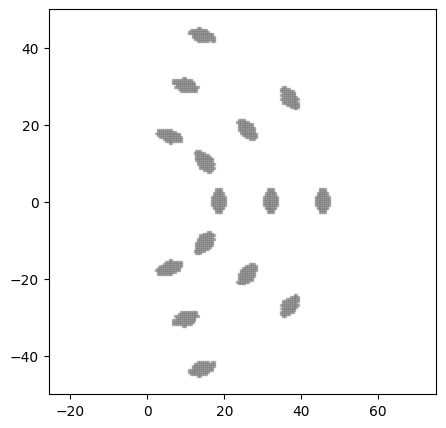

--------------------------------------------------
label: VentHole Chromosome_758: ['WingShape_311', 'CornerTransformation_556']
predict: (0.2891806113537003, 373.5717730999999, 456.33932219999997)
biased_fitness: 0.6209339311481958, fitness: 0.7086384099629972
shape parameter:
parameter_list: [ c: 2.2858284106416193, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


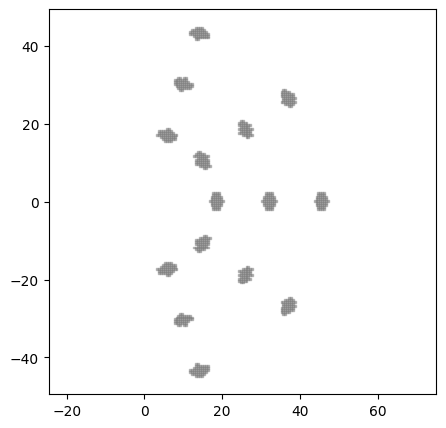

--------------------------------------------------
label: VentHole Chromosome_92: ['WingShape_443', 'CornerTransformation_369']
predict: (0.2889601302539795, 373.16019650000015, 456.7640805999999)
biased_fitness: 0.6252290327442864, fitness: 0.7107773119602048
shape parameter:
parameter_list: [ c: 3.0493757367759553, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


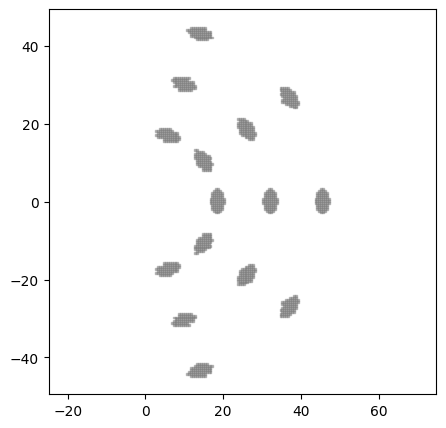

--------------------------------------------------
label: VentHole Chromosome_882: ['WingShape_92', 'CornerTransformation_617']
predict: (0.28885256582800434, 373.0059037, 456.67982949999976)
biased_fitness: 0.6276749009079398, fitness: 0.7130456757199579
shape parameter:
parameter_list: [ c: 3.0493757367759553, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


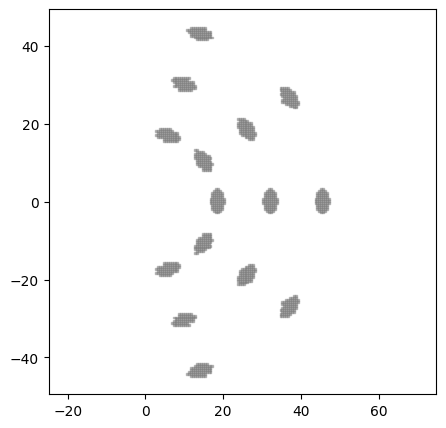

--------------------------------------------------
label: VentHole Chromosome_617: ['WingShape_150', 'CornerTransformation_572']
predict: (0.2888254221460904, 373.33479810000017, 457.50672839999993)
biased_fitness: 0.6247566426547333, fitness: 0.7075381460390953
shape parameter:
parameter_list: [ c: 2.7728083130456866, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


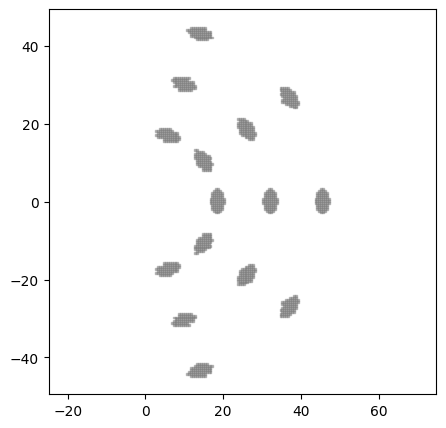

--------------------------------------------------
label: VentHole Chromosome_572: ['WingShape_443', 'CornerTransformation_617']
predict: (0.2889601302539795, 373.16019650000015, 456.7640805999999)
biased_fitness: 0.6252290327442864, fitness: 0.7107773119602048
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


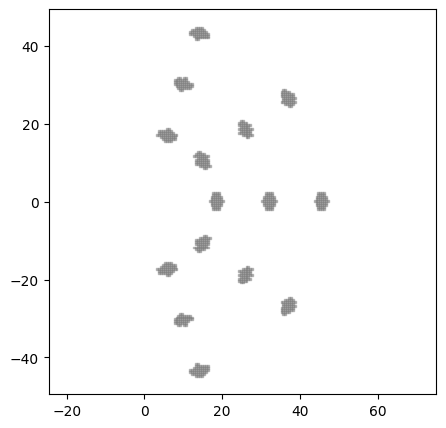

--------------------------------------------------
label: VentHole Chromosome_572: ['WingShape_572', 'CornerTransformation_617']
predict: (0.28970297730711625, 373.03158990000003, 457.74019859999987)
biased_fitness: 0.6135199710003725, fitness: 0.6991112844288379
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


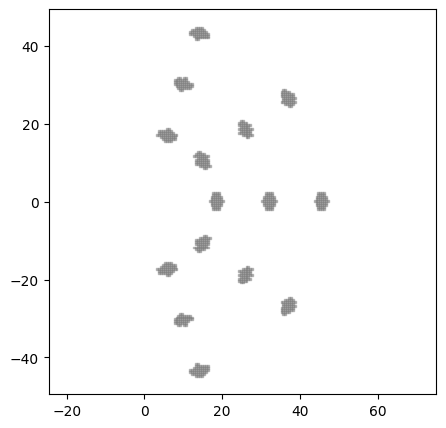

--------------------------------------------------
label: VentHole Chromosome_92: ['CircleShape_572', 'CornerTransformation_572']
predict: (0.2892183882428707, 373.86436679999986, 457.03597449999984)
biased_fitness: 0.6175487815998109, fitness: 0.7033144110712942
shape parameter:
parameter_list: [ r: 1.8465450241038919, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


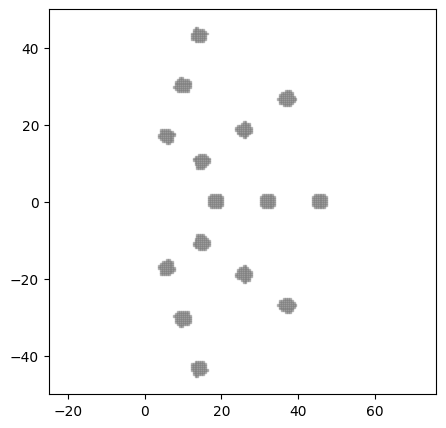

--------------------------------------------------
label: VentHole Chromosome_572: ['WingShape_150', 'CornerTransformation_617']
predict: (0.2898095176106903, 373.54515520000007, 457.8564425999997)
biased_fitness: 0.609228092250336, fitness: 0.6948968348930982
shape parameter:
parameter_list: [ c: 3.3355702359443784, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


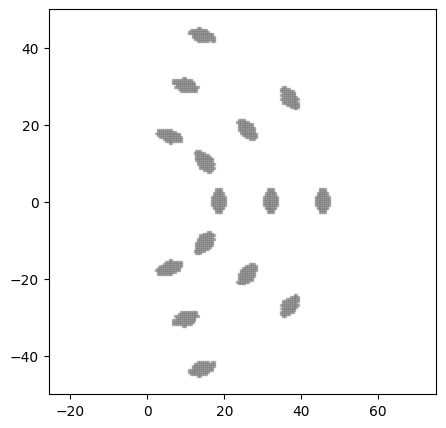

--------------------------------------------------
label: VentHole Chromosome_556: ['WingShape_572', 'CornerTransformation_92']
predict: (0.289558585161763, 373.72285260000007, 456.44340019999964)
biased_fitness: 0.6146787443353179, fitness: 0.703582884382371
shape parameter:
parameter_list: [ c: 3.3355702359443784, ]
pattern parameter:
parameter_list: [ di: 8.095128787015271, dx: 3.3140475770991715, phi: 0.7468001531343851, rot_count: 2.0, ]


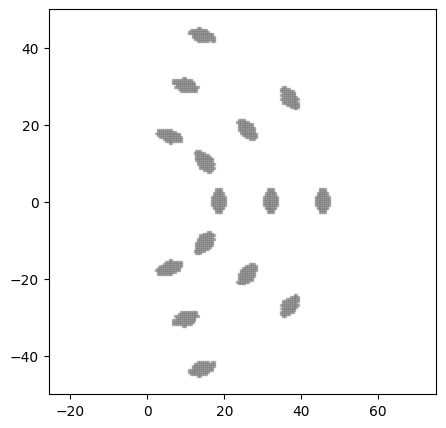

--------------------------------------------------
label: VentHole Chromosome_443: ['DoubleParabolicShape_597', 'CornerTransformation_150']
predict: (0.2893474321830556, 373.2560896000002, 457.60252900000006)
biased_fitness: 0.6176504434372203, fitness: 0.7022325851694425
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


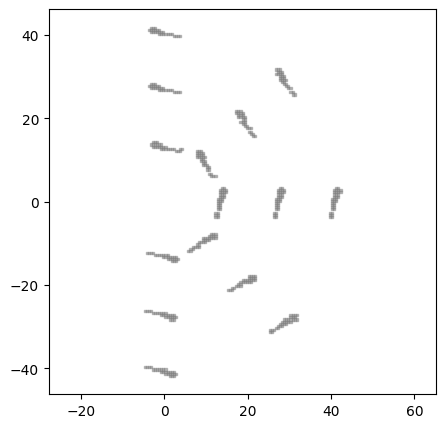

--------------------------------------------------
label: VentHole Chromosome_572: ['WingShape_225', 'CornerTransformation_617']
predict: (0.2896831385603167, 373.58008819999986, 457.83246929999996)
biased_fitness: 0.610870680555567, fitness: 0.6961058268968339
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


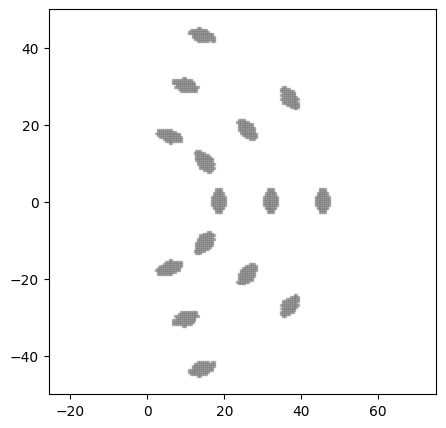

--------------------------------------------------
label: VentHole Chromosome_970: ['CircleShape_225', 'CornerTransformation_995']
predict: (0.2893416079716302, 373.41615649999994, 457.5591894999998)
biased_fitness: 0.6170183268971774, fitness: 0.701707190283699
shape parameter:
parameter_list: [ r: 2.472517119438649, ]
pattern parameter:
parameter_list: [ di: 11.08113604105247, dx: 5.7163150203072455, phi: 0.38248993967485617, rot_count: 6.0, ]


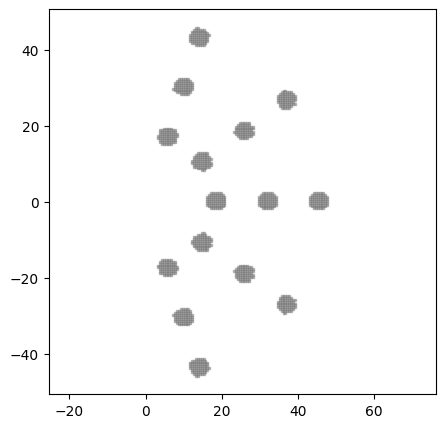

--------------------------------------------------
label: VentHole Chromosome_177: ['CircleShape_389', 'CornerTransformation_882']
predict: (0.289632241216196, 373.64201840000004, 457.29330589999984)
biased_fitness: 0.6123519191732557, fitness: 0.6990009663380403
shape parameter:
parameter_list: [ r: 2.903238059093633, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


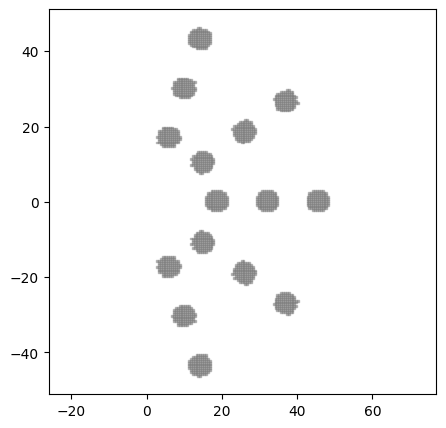

--------------------------------------------------
label: VentHole Chromosome_92: ['WingShape_268', 'CornerTransformation_796']
predict: (0.2891806113537003, 373.5717730999999, 456.33932219999997)
biased_fitness: 0.6209339311481958, fitness: 0.7086384099629972
shape parameter:
parameter_list: [ c: 2.2858284106416193, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


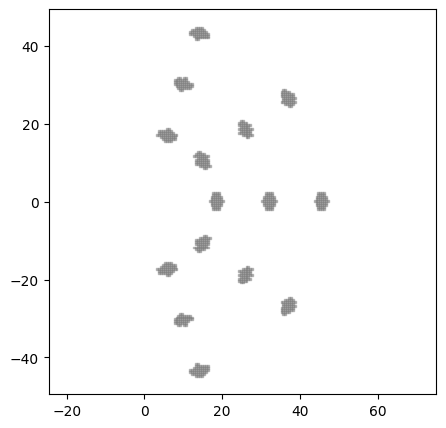

--------------------------------------------------
label: VentHole Chromosome_995: ['WingShape_443', 'CornerTransformation_443']
predict: (0.28933580503080747, 373.19798870000005, 458.6265653999997)
biased_fitness: 0.6160556552686955, fitness: 0.6975191791919263
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


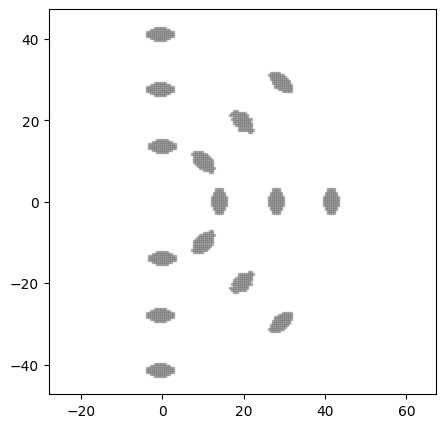

--------------------------------------------------
label: VentHole Chromosome_597: ['WingShape_572', 'CornerTransformation_617']
predict: (0.2893724011264962, 373.17376870000015, 458.36384520000007)
biased_fitness: 0.616189850329052, fitness: 0.6985879192350367
shape parameter:
parameter_list: [ c: 2.7728083130456866, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


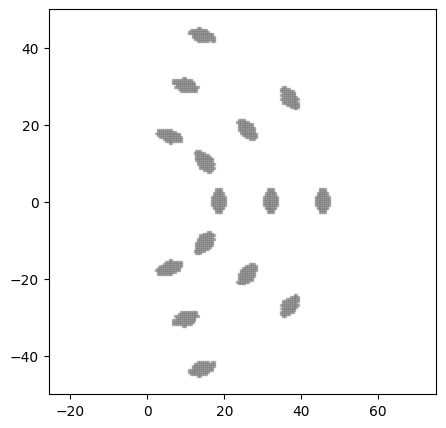

--------------------------------------------------
label: VentHole Chromosome_499: ['WingShape_889', 'CornerTransformation_597']
predict: (0.2892030718002121, 373.6005685000002, 457.4772506)
biased_fitness: 0.6181996510970296, fitness: 0.702580186497878
shape parameter:
parameter_list: [ c: 3.2833700124393346, ]
pattern parameter:
parameter_list: [ di: 13.063921881259471, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


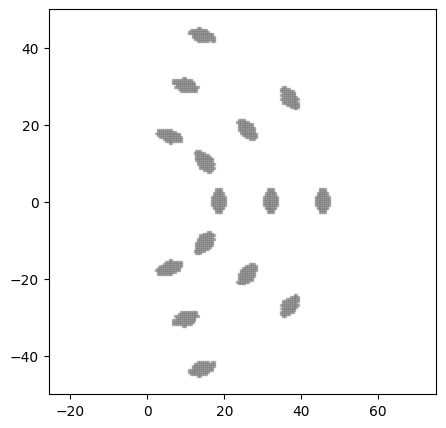

--------------------------------------------------
label: VentHole Chromosome_64: ['CircleShape_189', 'CornerTransformation_889']
predict: (0.28899390862644436, 373.175933, 457.1792184999997)
biased_fitness: 0.6238471772297794, fitness: 0.7082851562355579
shape parameter:
parameter_list: [ r: 2.903238059093633, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


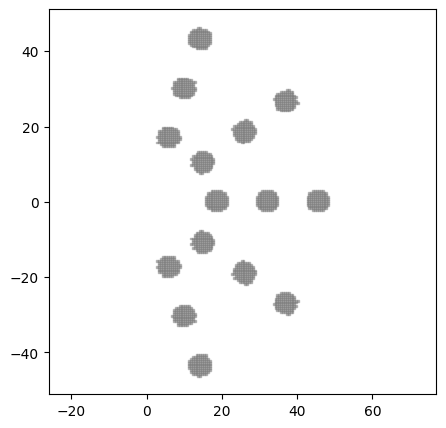

--------------------------------------------------
label: VentHole Chromosome_92: ['DoubleParabolicShape_335', 'CornerTransformation_988']
predict: (0.2889479114463087, 372.9434604999999, 457.8063517999999)
biased_fitness: 0.6243992336516786, fitness: 0.7067718240369137
shape parameter:
parameter_list: [ lower_coefficient: 2.431986039319252, upper_coefficient: 1.657219241808542, lower_y-intercept: 1.6236508550436084, upper_y-intercept_from_lower_y: 1.8404894773806535, lower_x_trans: -0.9381568691782664, ]
pattern parameter:
parameter_list: [ di: 8.928209897483105, dx: 3.7025821236145893, phi: 0.38248993967485617, rot_count: 6.0, ]


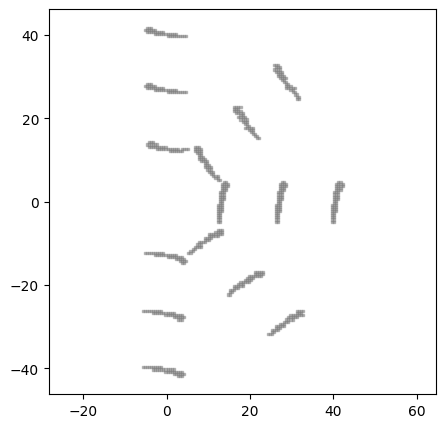

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )